## Chapter 1.5: Creating models from scratch
***
So far we have shown the basics to create geological models by importing data from an external source (in especial GeoModeller 3D). In this chapter, we will explore the option available in GemPy to create the data directly in GemPy or to modify existing one. In this respect we will delve into the pandas DataFrames that contain the necessary data.

Let's start as always by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib
import theano
import qgrid

#%matplotlib widget


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
#gp.save_model(geo_model)

In [3]:
#

if False:
    geo_model = gp.load_model('CreateModelTuto5.pickle')
else:
    geo_model = gp.create_model('CreateModelTuto5')
    gp.init_data(geo_model, [0, 1000, 0, 1000, -1000, 0], [50, 50, 50])
    geo_model.set_default_surfaces()
    geo_model.add_surface_points(400, 300, -500, 'surface1')
    geo_model.add_surface_points(600, 300, -500, 'surface1')

- check pickle works
- when we set an is fault change the BottomRelation

In [4]:
geo_model = gp.create_model('CreateModelTuto5')
gp.init_data(geo_model, [0, 1000, 0, 1000, -1000, 0], [50, 50, 50])

CreateModelTuto5  2019-03-13 11:15

In [5]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,id


In [6]:
geo_model.set_default_surfaces()


,surface,series,order_surfaces,isBasement,id
0,surface1,Default series,1,False,1
1,basement,Default series,2,True,2


Some default values but to make the model a bit faster but they are not necessary:

In [7]:
# #geo_model.add_formations(['surface1', 'basement'])
# geo_model.set_default_formations()
# geo_model.add_interfaces(400, 300, -500, 'surface1')
# geo_model.add_interfaces(600, 300, -500, 'surface1')
# #geo_model.set_default_orientation()

In [8]:
gp.set_interpolation_data(geo_model,  verbose=[])

Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_compile
device,cpu
verbosity,[]


In [9]:
gp.activate_interactive_df(geo_model)

AttributeError: 'Model' object has no attribute 'set_default_interface'

It is important to get df with get to update the models sinde the `activate_interactive` method is called

In [ ]:
geo_model.qi.get('orientations')

In [ ]:
geo_model.qi.get('surface_points')

In [ ]:
geo_model.qi.get('surfaces')

In [ ]:
geo_model.qi.get('series')

In [ ]:
geo_model.qi.get('faults')

In [ ]:
geo_model.qi.get('faults_relations')

In [ ]:
geo_model.surfaces

In [ ]:
geo_model.surfaces.set_surfaces_names(['foo', 'foo2'])

In [ ]:
geo_model.additional_data

In [9]:
geo_model.qi.qgrid_kr


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [10]:
geo_model.update_to_interpolator()
gp.compute_model(geo_model, compute_mesh=False)


Lithology ids 
  [2. 2. 2. ... 1. 1. 1.] 
Lithology scalar field 
  [30.01812363 30.03638077 30.05445099 ... 41.43769836 41.46269989
 41.48770142] 
Fault block 
  []

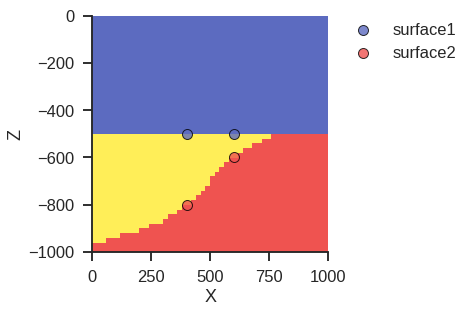

In [11]:
gp.plot.plot_section(geo_model, 15, plot_data=True)

In [6]:
geo_model.solutions.

array([2., 2., 3., ..., 1., 1., 1.])

In [48]:
geo_model.solutions.scalar_field_lith

array([40.11612701, 40.11792374, 40.11954498, ..., 40.39928436,
       40.40775681, 40.41636276])

In [52]:
geo_model.solutions.scalar_field_at_interfaces.sum(axis=0)

array([40.22205353, 40.23651886])

In [54]:
geo_model.additional_data.structure_data.df

,isLith,isFault,number faults,number formations,number series,number formations per series,len formations interfaces,len series interfaces,len series orientations
values,True,False,0,4,1,[2],"[3, 4]",[7],"[1, 1]"
